# Titanic을 활용한 Machine Learning 연습

In [224]:
# Google Drive 에 모델을 저장하기 위해 Colab의 /content/gdrive/ 에 Google Drive 마운트 시킴

from google.colab import drive   # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

drive.mount('/content/gdrive/')  # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [225]:
# 마운트된 Google Drive 의 working directory 이동

import os

checkpoint_path = 'titanic'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Google Drive 에서 Colab Default Directory
colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'

original_dir = os.getcwd()  # save current dir

try:

    os.chdir(colab_default_dir)

    if not os.path.exists(checkpoint_path):
        os.mkdir(checkpoint_path)

    os.chdir(checkpoint_path)  # change working dir
    print('current dir = ', os.getcwd())

except Exception as err:
    
    os.chdir(original_dir)
    print(str(err))

('current dir = ', '/content/gdrive/My Drive/Colab Notebooks/titanic')


##  2.판닥스를 활용한 Dataset 만들기

In [226]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [227]:
#train = pd.read_csv('train.csv', encoding="utf-8")

## 3. 데이터 형태 확인

In [228]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [229]:
test.head()    # survived 없음

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [230]:
train.shape

(891, 12)

In [231]:
test.shape

(418, 11)

In [232]:
train.info()   # Age, Cabin, Embarked 자료 일부 비어 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [233]:
test.info()    # Age, Cabin, Embarked 자료 일부 비어 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [234]:
train.isnull().sum()    # Age, Cabin, Embarked 자료 일부 비어 있음

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [235]:
test.isnull().sum()    # Age, Cabin, Embarked 자료 일부 비어 있음

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [236]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### Features를 찾기 위한 Bar Chart 그리기

In [237]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

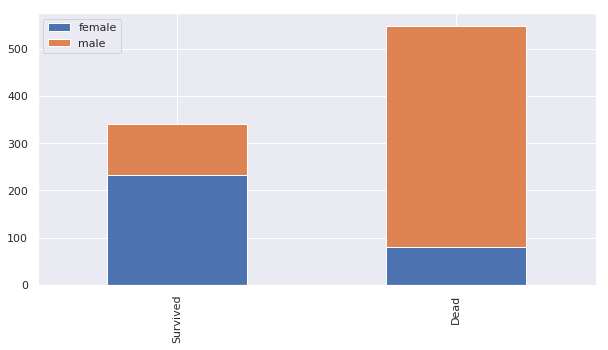

In [238]:
bar_chart('Sex')

## 4. Feature engineering(전처리 시작)
- 변수 가공(데이터 분석에서, 그대로 사용하기에는 어려운 데이터의 변수를 가공하여 데이터를 비교적 간단명료하게 만드는 것) 


In [239]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 4.2 Name

In [240]:
train_test_data = [train, test] # combining train and test dataset    훈련 및 시험 데이터 세트 결합
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)   # True : Column단위 출력, False : Lable단위 출력  이름에서 Mr., Miss., Mrs. 등만 빼 냄
# train 화일 중 Name에서 앞에부터 탐색을 시작하여 대문자 소문자로 시작하여 .을 만나면 탐색을 멈추고 string을 추출

In [241]:
dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Mrs
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Mr


In [242]:
train_test_data[0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [243]:
train_test_data[1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Mrs
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Mr


In [244]:
train['Title'].value_counts()    # 이름은 머신런닝을 하기 위해 필요없으나 Mr, Miss 등을 나이의 판단을 위해 확인


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Title, dtype: int64

In [245]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

#### Title map
Mr : 0, Miss : 1, Mrs: 2, Others: 3


In [246]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [247]:
#위에서 훈련 및 시험 데이터 세트를 결합했기 때문에 두 데이터 세트를 한번에 바꿔줄 수 있다.

In [248]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [249]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


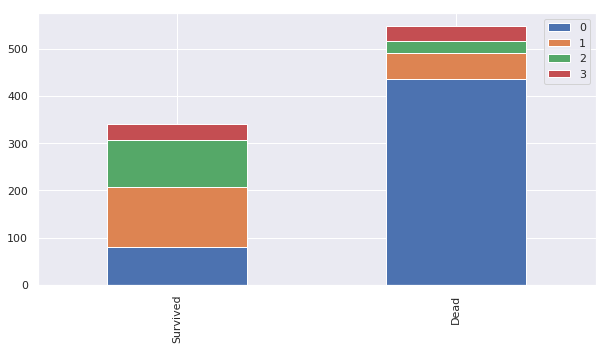

In [250]:
bar_chart('Title')

In [251]:
# delete unnecessary feature from dataset   Label 단위로 drop하고 True라 출력안함
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

train.drop('Fare', axis=1, inplace=True)
test.drop('Fare', axis=1, inplace=True)

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [252]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,male,22.0,1,0,S,0
1,1,1,female,38.0,1,0,C,2
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,2
4,0,3,male,35.0,0,0,S,0


In [253]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,3,male,34.5,0,0,Q,0
1,3,female,47.0,1,0,S,2
2,2,male,62.0,0,0,Q,0
3,3,male,27.0,0,0,S,0
4,3,female,22.0,1,1,S,2


### 4.3 Sex

male: 0
female: 1

In [254]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

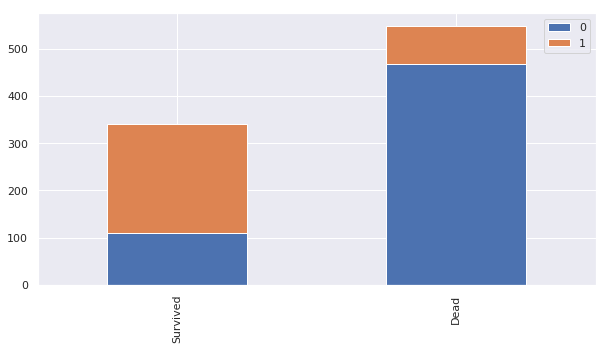

In [255]:
bar_chart('Sex')

### 4.4 Age

#### 4.4.1 일부 나이가 빠진 사람 나이 넣기

In [256]:
train.head(30)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,0,22.0,1,0,S,0
1,1,1,1,38.0,1,0,C,2
2,1,3,1,26.0,0,0,S,1
3,1,1,1,35.0,1,0,S,2
4,0,3,0,35.0,0,0,S,0
5,0,3,0,NaN,0,0,Q,0
6,0,1,0,54.0,0,0,S,0
7,0,3,0,2.0,3,1,S,3
8,1,3,1,27.0,0,2,S,2
9,1,2,1,14.0,1,0,C,2


In [257]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)  # title로 groupby를 하되 Age가 비어있을 때는 Title에 해당하는 나이의 중간값을 채우기
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)    # inplace=True의 경우 실행 후 데이터프레임으로 기존 데이터프레임을 대체하겠다

In [258]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
Title       891 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 55.8+ KB


In [259]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Embarked    418 non-null object
Title       418 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 22.9+ KB


#### 4.4.2 Binning : 정렬하는 방식의 하나. 정렬 대상의 키들을 일정한 범위로 구분해 버킷에 넣고 그 버킷 각각을 정렬하는 방법
 
child: 0, young: 1, adult: 2, mid-age: 3, senior: 4

In [260]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [261]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,0,1.0,1,0,S,0
1,1,1,1,3.0,1,0,C,2
2,1,3,1,1.0,0,0,S,1
3,1,1,1,2.0,1,0,S,2
4,0,3,0,2.0,0,0,S,0


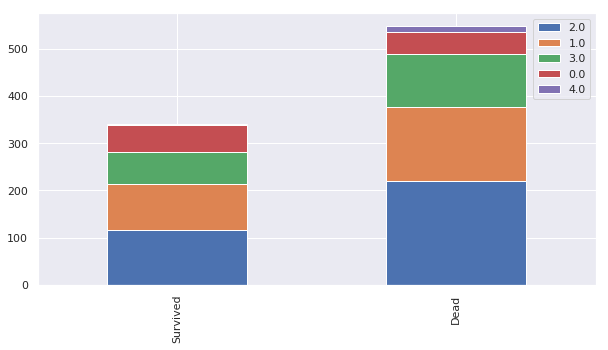

In [262]:
bar_chart('Age')

In [263]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')     # 큰문제 없으니 빈칸은 'S'로 채워라

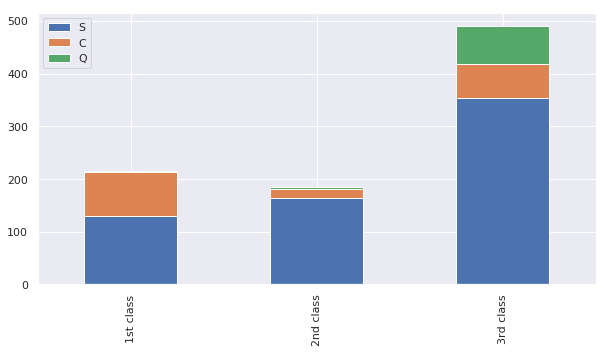

In [264]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [265]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

### 4.8 FamilySize  : 형제자매와 부모자식 항목을 묶었음

In [266]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

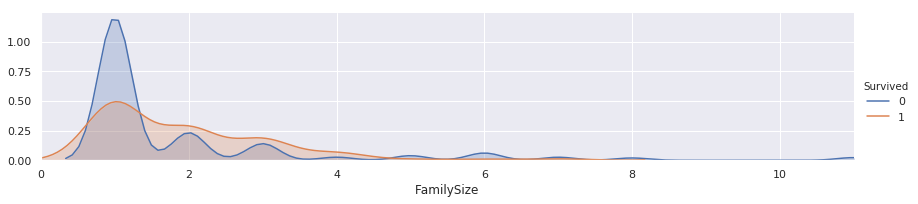

In [267]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [268]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [269]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,FamilySize
0,0,3,0,1.0,1,0,0,0,0.4
1,1,1,1,3.0,1,0,1,2,0.4
2,1,3,1,1.0,0,0,0,1,0.0
3,1,1,1,2.0,1,0,0,2,0.4
4,0,3,0,2.0,0,0,0,0,0.0


In [270]:
features_drop = ['SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [271]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,Title,FamilySize
0,0,3,0,1.0,0,0,0.4
1,1,1,1,3.0,1,2,0.4
2,1,3,1,1.0,0,1,0.0
3,1,1,1,2.0,0,2,0.4
4,0,3,0,2.0,0,0,0.0


In [272]:
target = train['Survived']
train_data = train.drop('Survived', axis=1) # train_data에는 'Survived'가 삭제되어 들어 가지만 train에서도 삭제하고 싶으면 inplace=True를 써야 

train_data.shape, target.shape

((891, 6), (891,))

In [273]:
train_data.head(10)

,Pclass,Sex,Age,Embarked,Title,FamilySize
0,3,0,1.0,0,0,0.4
1,1,1,3.0,1,2,0.4
2,3,1,1.0,0,1,0.0
3,1,1,2.0,0,2,0.4
4,3,0,2.0,0,0,0.0
5,3,0,2.0,2,0,0.0
6,1,0,3.0,0,0,0.0
7,3,0,0.0,0,3,1.6
8,3,1,2.0,0,2,0.8
9,2,1,0.0,1,2,0.4


In [274]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.8 KB


## 5. Modelling

In [275]:
#importing all the required ML packages

import tensorflow as tf
import numpy as np

from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.svm import SVC #support vector Machine

#from sklearn.linear_model import LogisticRegression #logistic regression
#from sklearn.model_selection import train_test_split #training and testing data split
#from sklearn import metrics #accuracy measure
#from sklearn.metrics import confusion_matrix #for confusion matrix

### 6.2 Cross Validation (K-fold)
- 교차검증(k개의 fold를 만들어(k겹) 교차검증)
- 데이터의 모든 부분을 사용하여 모델을 검증하고, test set을 하나로 고정하지 

In [276]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score  # 각 폴드에서 훈련과 테스트에 걸린 시간을 반환하고 scoring 매개변수에 지정한 평가 지표마다 훈련 점수와 테스트 점수를 반환합니다.

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)  # 10등분하기 전 전체 데이터를 한번 섞는다. 그 이후 10개로 쪼개는 과정에서는 섞지 않는다

### 6.2.1 kNN
- K-Nearest Neighbor(k-최근접 이웃 알고리즘)
- k=2때, k=9 때

In [277]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.79775281 0.80898876 0.82022472 0.82022472 0.83146067
 0.78651685 0.84269663 0.82022472 0.84269663]


In [278]:
# kNN Score
round(np.mean(score)*100, 2)

82.26

### 6.2.2 Decision Tree
- 의사결정나무

In [279]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.73333333 0.82022472 0.79775281 0.78651685 0.84269663 0.78651685
 0.83146067 0.80898876 0.75280899 0.78651685]


In [280]:
# decision tree Score
round(np.mean(score)*100, 2)

79.47

### 6.2.3 Ramdom Forest

In [281]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.80898876 0.78651685 0.75280899 0.83146067 0.80898876
 0.82022472 0.82022472 0.75280899 0.79775281]


In [282]:
# Random Forest Score
round(np.mean(score)*100, 2)

79.58

### 6.2.4 Naive Bayes
- '나이브 베이즈' 분류는 특성들 사이의 독립을 가정하는 베이즈 정리를 적용한 확률 분류기의 일종 

In [283]:
clf = GaussianNB()    # 가우시안 나이브 베이즈
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.76404494 0.83146067 0.79775281 0.82022472 0.80898876
 0.83146067 0.80898876 0.84269663 0.85393258]


In [284]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

81.6

### 6.2.5 SVM

In [285]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.82022472 0.82022472 0.82022472 0.85393258 0.82022472
 0.84269663 0.85393258 0.82022472 0.84269663]


In [286]:
round(np.mean(score)*100,2)

83.28

## 7. Testing

In [287]:
test_20years = pd.read_csv('20years.csv')

In [288]:
test_20years.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 13 columns):
number         14 non-null int64
PassengerId    14 non-null int64
Survived       14 non-null int64
Pclass         14 non-null int64
Name           14 non-null object
Sex            14 non-null object
Age            14 non-null int64
SibSp          14 non-null int64
Parch          14 non-null int64
Ticket         14 non-null object
Fare           14 non-null float64
Cabin          3 non-null object
Embarked       14 non-null object
dtypes: float64(1), int64(7), object(5)
memory usage: 1.5+ KB


In [289]:
test_20years.shape

(14, 13)

In [290]:
test_20years.isnull().sum()

number          0
PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          11
Embarked        0
dtype: int64

In [291]:
test_20years_data = test_20years.copy(True)
test_20years_data['Title'] = test_20years_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [292]:
test_20years_data['Title'].value_counts()

Mr    14
Name: Title, dtype: int64

In [293]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
test_20years_data['Title'] = test_20years_data['Title'].map(title_mapping)

In [294]:
test_20years_data.head(14)

,number,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0
1,12,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,NaN,S,0
2,23,24,1,1,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.5000,A6,S,0
3,72,73,0,2,"Hood, Mr. Ambrose Jr",male,21,0,0,S.O.C. 14879,73.5000,NaN,S,0
4,73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26,1,0,2680,14.4542,NaN,C,0
5,75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.6500,F G73,S,0
6,80,81,0,3,"Waelens, Mr. Achille",male,22,0,0,345767,9.0000,NaN,S,0
7,81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29,0,0,345779,9.5000,NaN,S,0
8,83,84,0,1,"Carrau, Mr. Francisco M",male,28,0,0,113059,47.1000,NaN,S,0
9,89,90,0,3,"Celotti, Mr. Francesco",male,24,0,0,343275,8.0500,NaN,S,0


In [295]:
test_20years_data.drop('Name', axis=1, inplace=True)
test_20years_data.drop('PassengerId', axis=1, inplace=True)
test_20years_data.drop('Ticket', axis=1, inplace=True)
test_20years_data.drop('Fare', axis=1, inplace=True)
test_20years_data.drop('Cabin', axis=1, inplace=True)

In [296]:
test_20years_data.head()

,number,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,0,3,male,22,1,0,S,0
1,12,0,3,male,20,0,0,S,0
2,23,1,1,male,28,0,0,S,0
3,72,0,2,male,21,0,0,S,0
4,73,0,3,male,26,1,0,C,0


In [297]:
sex_mapping = {"male": 0, "female": 1}
test_20years_data['Sex'] = test_20years_data['Sex'].map(sex_mapping)

In [298]:
test_20years_data.head()

,number,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,0,3,0,22,1,0,S,0
1,12,0,3,0,20,0,0,S,0
2,23,1,1,0,28,0,0,S,0
3,72,0,2,0,21,0,0,S,0
4,73,0,3,0,26,1,0,C,0


In [299]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
test_20years_data["Age"].fillna(test_20years_data.groupby("Title")["Age"].transform("median"), inplace=True)

In [300]:
test_20years_data.head()

,number,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,0,3,0,22,1,0,S,0
1,12,0,3,0,20,0,0,S,0
2,23,1,1,0,28,0,0,S,0
3,72,0,2,0,21,0,0,S,0
4,73,0,3,0,26,1,0,C,0


In [301]:
test_20years_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 9 columns):
number      14 non-null int64
Survived    14 non-null int64
Pclass      14 non-null int64
Sex         14 non-null int64
Age         14 non-null int64
SibSp       14 non-null int64
Parch       14 non-null int64
Embarked    14 non-null object
Title       14 non-null int64
dtypes: int64(8), object(1)
memory usage: 1.1+ KB


In [302]:
Age_mapping = {17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 2}
test_20years_data['Age'] = test_20years_data['Age'].map(Age_mapping)

In [303]:
test_20years_data['Embarked'] = test_20years_data['Embarked'].fillna('S')

In [304]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
test_20years_data['Embarked'] = test_20years_data['Embarked'].map(embarked_mapping)

In [305]:
test_20years_data["FamilySize"] = test_20years_data["SibSp"] + test_20years_data["Parch"] + 1

In [306]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
test_20years_data['FamilySize'] = test_20years_data['FamilySize'].map(family_mapping)

In [307]:
features_drop = ['SibSp', 'Parch']
test_20years_data = test_20years_data.drop(features_drop, axis=1)

In [308]:
test_20years_target = test_20years_data['Survived']
test_20years_data = test_20years_data.drop('Survived', axis=1)

test_20years_data.shape

(14, 7)

In [309]:
test_20years_target.shape

(14,)

In [310]:
test_20years_data.head(14)

,number,Pclass,Sex,Age,Embarked,Title,FamilySize
0,0,3,0,1,0,0,0.4
1,12,3,0,1,0,0,0.0
2,23,1,0,2,0,0,0.0
3,72,2,0,1,0,0,0.0
4,73,3,0,1,1,0,0.4
5,75,3,0,1,0,0,0.0
6,80,3,0,1,0,0,0.0
7,81,3,0,2,0,0,0.0
8,83,1,0,2,0,0,0.0
9,89,3,0,1,0,0,0.0


In [311]:
test_20years_target.head(14)

0     0
1     0
2     1
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    1
Name: Survived, dtype: int64

In [312]:
test_20years_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
number        14 non-null int64
Pclass        14 non-null int64
Sex           14 non-null int64
Age           14 non-null int64
Embarked      14 non-null int64
Title         14 non-null int64
FamilySize    14 non-null float64
dtypes: float64(1), int64(6)
memory usage: 856.0 bytes


In [313]:
test_20years_data = test_20years_data.drop('number', axis=1)

In [314]:
test_20years_data.head(14)

,Pclass,Sex,Age,Embarked,Title,FamilySize
0,3,0,1,0,0,0.4
1,3,0,1,0,0,0.0
2,1,0,2,0,0,0.0
3,2,0,1,0,0,0.0
4,3,0,1,1,0,0.4
5,3,0,1,0,0,0.0
6,3,0,1,0,0,0.0
7,3,0,2,0,0,0.0
8,1,0,2,0,0,0.0
9,3,0,1,0,0,0.0


In [315]:
clf = SVC()
clf.fit(train_data, target)
predictions = clf.predict(test_20years_data)

In [316]:
predictions[0:5]

array([0, 0, 0, 0, 0])

In [317]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [318]:
test_20years.head(14)

,number,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,12,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,NaN,S
2,23,24,1,1,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.5000,A6,S
3,72,73,0,2,"Hood, Mr. Ambrose Jr",male,21,0,0,S.O.C. 14879,73.5000,NaN,S
4,73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26,1,0,2680,14.4542,NaN,C
5,75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.6500,F G73,S
6,80,81,0,3,"Waelens, Mr. Achille",male,22,0,0,345767,9.0000,NaN,S
7,81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29,0,0,345779,9.5000,NaN,S
8,83,84,0,1,"Carrau, Mr. Francisco M",male,28,0,0,113059,47.1000,NaN,S
9,89,90,0,3,"Celotti, Mr. Francesco",male,24,0,0,343275,8.0500,NaN,S


In [318]:
# 12번째 사람을 여자로 바꿨는 사망으로 나와 1등실로 추가로 바꾸니 생존으로...